<a href="https://colab.research.google.com/github/alfiacn/Cobaan/blob/main/SIAP%2BPERANG%2BEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
price=pd.read_csv('https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv')

In [ ]:
price.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [ ]:
price.sample(10)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
580,581,9547.0,11233.0,13642.0,1526.0,1842.0,Open,CAT C,690,3958000
523,524,8588.0,13937.0,8728.0,1191.0,1422.0,Open,CAT C,770,3635000
854,855,146.0,1666.0,3227.0,1072.0,1296.0,Open,CAT C,900,4759000
158,159,3761.0,7646.0,7251.0,1514.0,NaN,No Parking,CAT C,440,5485000
136,137,4233.0,10090.0,11422.0,1368.0,1654.0,No Parking,CAT A,530,6874000
116,117,6255.0,11047.0,10332.0,1415.0,1700.0,Covered,CAT B,920,3633000
288,289,7635.0,10625.0,12975.0,1517.0,1805.0,Covered,CAT C,1040,4174000
624,625,11124.0,8732.0,14790.0,1498.0,1805.0,Open,CAT A,1270,8227000
246,247,2999.0,11347.0,8760.0,1767.0,2110.0,Not Provided,CAT A,1200,6495000
604,605,5212.0,9235.0,9335.0,1455.0,1747.0,Open,CAT A,750,6932000


# Dasar Data Preparation

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(price))
# Ukuran Data
N, P = price.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 936, ', Kolom = ', 10)

In [ ]:
price.columns

Index(['Observation', 'Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet',
       'Builtup', 'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

In [ ]:
### Membuang kolom Observation (Gak Guna)
price.drop("Observation", axis=1, inplace=True)

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dist_Taxi      923 non-null    float64
 1   Dist_Market    923 non-null    float64
 2   Dist_Hospital  935 non-null    float64
 3   Carpet         928 non-null    float64
 4   Builtup        921 non-null    float64
 5   Parking        936 non-null    object 
 6   City_Category  936 non-null    object 
 7   Rainfall       936 non-null    int64  
 8   House_Price    936 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.9+ KB


In [ ]:
price['Parking']= price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      923 non-null    float64 
 1   Dist_Market    923 non-null    float64 
 2   Dist_Hospital  935 non-null    float64 
 3   Carpet         928 non-null    float64 
 4   Builtup        921 non-null    float64 
 5   Parking        936 non-null    category
 6   City_Category  936 non-null    category
 7   Rainfall       936 non-null    int64   
 8   House_Price    936 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 53.5 KB


In [ ]:
###cek data duplicate dan remove duplicate
print('cek awal =',price.duplicated().sum())
price.drop_duplicates(inplace=True)
price.info()

cek awal = 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      919 non-null    float64 
 1   Dist_Market    919 non-null    float64 
 2   Dist_Hospital  931 non-null    float64 
 3   Carpet         924 non-null    float64 
 4   Builtup        917 non-null    float64 
 5   Parking        932 non-null    category
 6   City_Category  932 non-null    category
 7   Rainfall       932 non-null    int64   
 8   House_Price    932 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.4 KB


**Memisahkan Data Kategorik dan Data Numerik**

*   List item
*   List item



In [ ]:
# Memilih hanya variable dengan tipe tertentu
price_numerik = price.select_dtypes(include = ['float64', 'int64'])
price_kategorik = price.select_dtypes(include = ['category'])

In [ ]:
price_numerik.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000


In [ ]:
price_kategorik.head()

,Parking,City_Category
0,Open,CAT B
1,Not Provided,CAT B
2,Not Provided,CAT A
3,Covered,CAT B
4,Not Provided,CAT B


In [ ]:
## One Hot Encoding
df = pd.get_dummies(price_kategorik['Parking'], prefix='Parking')
df.head()

,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


Keterangan: yang dijadikan OHE hanya data-data yang mau dimasukan ke value grafik (menjadi x atau y), sehingga diperlukan data numerik heehhehehe 

In [ ]:
##Mengabungkan Data ---> Nanti datanya di transpose supaya hasilnya bagus
df2 = pd.concat([price, df], axis=1)
df2.head().transpose()

,0,1,2,3,4
Dist_Taxi,9796.0,8294.0,11001.0,8301.0,10510.0
Dist_Market,5250.0,8186.0,14399.0,11188.0,12629.0
Dist_Hospital,10703.0,12694.0,16991.0,12289.0,13921.0
Carpet,1659.0,1461.0,1340.0,1451.0,1770.0
Builtup,1961.0,1752.0,1609.0,1748.0,2111.0
Parking,Open,Not Provided,Not Provided,Covered,Not Provided
City_Category,CAT B,CAT B,CAT A,CAT B,CAT B
Rainfall,530,210,720,620,450
House_Price,6649000,3982000,5401000,5373000,4662000
Parking_Covered,0,0,0,1,0


In [ ]:
# Choosing some columns manually
X = price[['House_Price','Dist_Market']]
X[:7]

,House_Price,Dist_Market
0,6649000,5250.0
1,3982000,8186.0
2,5401000,14399.0
3,5373000,11188.0
4,4662000,12629.0
5,4526000,5142.0
6,7224000,11869.0


# Noise dan Outlier

Univariate Outlier Removal
(Kalau misalnya ada outlier, untuk buang outliernya cek distribusi normal dulu)
>>> contoh kasus (Parking, House_Price) <<<

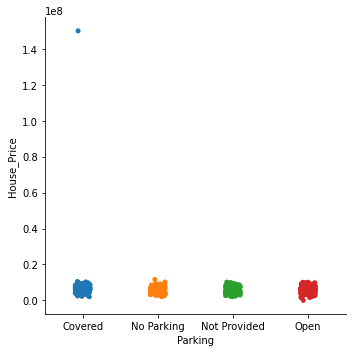

In [ ]:
# !pip uninstall seaborn

import matplotlib.pyplot as plt
plt.show()
import seaborn as sns



sns.catplot(x="Parking", y="House_Price", data=price)
# Apa yang bisa dilihat dari hasil ini?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


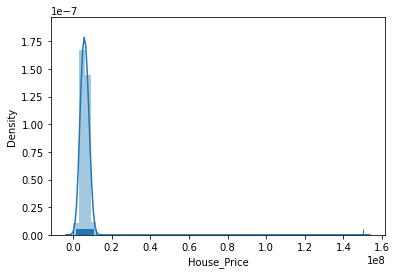

In [ ]:
# Distribution
p = sns.distplot(price['House_Price'],kde = True, rug = True)

In [ ]:
import numpy as np

In [ ]:
df = np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

#Dari data ini terlihat bahwa hanya ada 932 data yang tidak mengandung outlier 

(932,)


0    True
1    True
2    True
3    True
4    True
Name: House_Price, dtype: bool

In [ ]:
price2 = price[df] # Data tanpa outliers
print(price2.shape, price.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "Price2"
# Jika datanya besar hati-hati melakukan hal ini

(931, 9) (932, 9)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


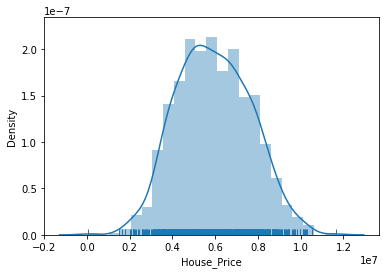

In [ ]:
# Distribution
p = sns.distplot(price2['House_Price'],kde = True, rug = True)

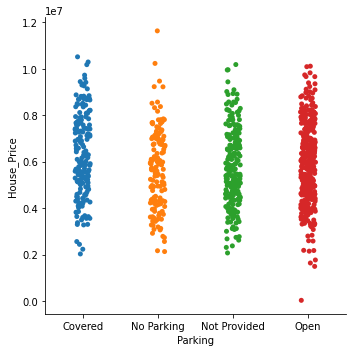

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", data = price2)

# Missing Value

In [ ]:
print(price2.isnull().sum())

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64


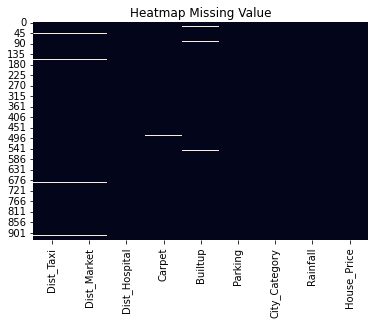

In [ ]:
sns.heatmap(price2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
(price2.isnull().sum()/len(price2)).to_frame('persentase missing')

,persentase missing
Dist_Taxi,0.013963
Dist_Market,0.013963
Dist_Hospital,0.001074
Carpet,0.008593
Builtup,0.016112
Parking,0.000000
City_Category,0.000000
Rainfall,0.000000
House_Price,0.000000


In [ ]:
# X = df2.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
# df2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
# df2.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
# df2.dropna(subset=['Dist_Hospital'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
#inplace=True if really really sure
# df2.dropna(inplace=True)

In [ ]:
print(price2.isnull().sum())

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64


# Statistika Deskriptif

In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
price_numerik.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dist_Taxi,919.0,8.229728e+03,2.561985e+03,146.0,6476.0,8230.0,9937.0,20662.0
Dist_Market,919.0,1.101875e+04,2.543921e+03,1666.0,9354.5,11161.0,12670.5,20945.0
Dist_Hospital,931.0,1.307209e+04,2.586456e+03,3227.0,11301.5,13163.0,14817.0,23294.0
Carpet,924.0,1.511863e+03,7.909697e+02,775.0,1318.0,1480.5,1655.0,24300.0
Builtup,917.0,1.794925e+03,4.681595e+02,932.0,1583.0,1774.0,1982.0,12730.0
Rainfall,932.0,7.855794e+02,2.655469e+02,-110.0,600.0,780.0,970.0,1560.0
House_Price,932.0,6.084695e+06,5.025364e+06,30000.0,4658000.0,5866000.0,7187250.0,150000000.0


In [ ]:
# Termasuk yang "kategorik"
price2.describe(include='all')

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
count,918.000000,918.000000,930.000000,923.000000,916.000000,931,931,931.000000,9.310000e+02
unique,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Open,CAT B,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,372,364,NaN,NaN
mean,8216.185185,11007.940087,13061.101075,1487.173348,1782.986900,NaN,NaN,785.209452,5.930114e+06
std,2530.254990,2524.088666,2566.001284,249.940193,297.634223,NaN,NaN,265.449171,1.728283e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,NaN,NaN,-110.000000,3.000000e+04
25%,6475.500000,9349.250000,11301.250000,1318.000000,1583.000000,NaN,NaN,600.000000,4.658000e+06
50%,8229.000000,11155.000000,13154.500000,1480.000000,1774.000000,NaN,NaN,780.000000,5.866000e+06
75%,9934.250000,12663.500000,14787.750000,1654.000000,1982.000000,NaN,NaN,965.000000,7.180500e+06


In [ ]:
# Termasuk yang "kategorik"
price[['Dist_Taxi','Parking']].describe(include='all')

,Dist_Taxi,Parking
count,919.000000,932
unique,NaN,4
top,NaN,Open
freq,NaN,372
mean,8229.727965,NaN
std,2561.985008,NaN
min,146.000000,NaN
25%,6476.000000,NaN
50%,8230.000000,NaN
75%,9937.000000,NaN


# Distribusi Nilai pada Var Kategorik

In [ ]:
# get all unique values of a variable/column
for col in price_kategorik.columns:
    print(col,': ', set(price[col].unique()))

Parking :  {'Covered', 'No Parking', 'Not Provided', 'Open'}
City_Category :  {'CAT B', 'CAT A', 'CAT C'}


In [ ]:
price['Parking'].unique()

['Open', 'Not Provided', 'Covered', 'No Parking']
Categories (4, object): ['Covered', 'No Parking', 'Not Provided', 'Open']

In [ ]:
# price
# Jika yang dibutuhkan memang hanya nama kolom, maka kita bisa melakukan hal ini untuk menghemat penggunaan memory
numVar = price.select_dtypes(include = ['float64', 'int64']).columns
list(numVar)

['Dist_Taxi',
 'Dist_Market',
 'Dist_Hospital',
 'Carpet',
 'Builtup',
 'Rainfall',
 'House_Price']

In [ ]:
# Distribusi tiap data
price['Parking'].value_counts()
# kita bisa juga visualisasikan informasi ini

Open            372
Not Provided    227
Covered         188
No Parking      145
Name: Parking, dtype: int64

# Two-Way Tables (Cross Tab)

In [ ]:
CT = pd.crosstab(index=price2["City_Category"], columns=price2["Parking"])
CT

Parking,Covered,No Parking,Not Provided,Open
City_Category,,,,
CAT A,75,51,82,121
CAT B,63,53,89,159
CAT C,49,41,56,92


# Data Grouping

In [ ]:
# Slicing DataFrame - Just like query in SQL
price2[price2["City_Category"] == "CAT B"].describe()
# Bisa ditambahkan .drop("Parking", axis=1) untuk menghilangkan kolom dengan single value

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,357.000000,357.000000,364.000000,361.000000,357.000000,364.000000,3.640000e+02
mean,8065.876751,10685.016807,12851.826923,1502.734072,1800.487395,782.005495,5.523321e+06
std,2475.234349,2515.341727,2557.366363,252.349298,298.367436,259.430591,1.317889e+06
min,604.000000,4950.000000,4922.000000,869.000000,1050.000000,0.000000,2.130000e+06
25%,6382.000000,8908.000000,11168.500000,1327.000000,1584.000000,590.000000,4.617750e+06
50%,8012.000000,10711.000000,12933.500000,1487.000000,1787.000000,770.000000,5.456000e+06
75%,9770.000000,12503.000000,14659.250000,1688.000000,2022.000000,952.500000,6.378500e+06
max,15082.000000,17101.000000,19617.000000,2215.000000,2647.000000,1560.000000,9.661000e+06


# Saving (prepocessed) Data

In [ ]:
# Saving the preprocessed Data for future use/analysis
price2.to_csv("data/price_PreProcessed.csv", encoding='utf8')

In [ ]:
databaru = pd.read_csv("/content/data/price_PreProcessed.csv")

# **VISUALISASI DATA**

Intinya adalah coba run dari awal sampe akhir, supaya kalau ada missing value plotnya ga jadi jelek

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [ ]:
price2.describe(include='all').transpose()

In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)
# Apa yang bisa dilihat dari hasil ini?

In [ ]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="swarm", data=price2)
plt.show()

In [ ]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="Parking", data=price2)
plt.show()

In [ ]:
price2.groupby(["Parking", "City_Category"]).size().unstack()

In [ ]:
ax = sns.countplot(y = 'Parking', hue = 'City_Category', palette = 'muted', data=price2)
plt.show()

In [ ]:
tips=sns.load_dataset('tips')
categorical = tips.select_dtypes(include = ['category']).columns
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(tips[variable], ax=subplot)

In [ ]:
CT = pd.crosstab(index=price2["City_Category"], columns=price2["Parking"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

# Saving Plot to Image

In [ ]:
# ini dilakukan jika kita ingin menyimpan plotnya ke dalam suatu file
p.figure.savefig('barChart.png')
# lihat di folder ipynb-nya akan muncul file baru.

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

p = mosaic(tips, ['sex','smoker','time'])

In [ ]:
# PieChart
plot = price2.City_Category.value_counts().plot(kind='pie')

In [ ]:
data = price2['Parking']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y']
labels = proporsion.keys()
explode = (0.2, 0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Tipe Parkir')
plt.legend(labels,loc='best')
plt.show()

In [ ]:
# Jika ada outlier grafiknya menjadi tidak jelas (data = price, bukan price2)
p = sns.boxplot(x="House_Price", y="Parking", data=price)

In [ ]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)
# Apa makna pola yang terlihat di data oleh BoxPlot ini?

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

In [ ]:
p= sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

In [ ]:
p = sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

In [ ]:
col = 'House_Price'
plot = sns.displot(data=price2, x=col, kde=True)

In [ ]:
plot = sns.displot(data=price2, x=col, hue='Parking', kind="kde")

In [ ]:
numerical = price2.select_dtypes(include = ['int64','float64']).columns

price2[numerical].hist(figsize=(15, 6), layout=(2, 4));

In [ ]:
p = sns.scatterplot(x=price2['House_Price'], y=price2['Dist_Market'], hue = price2['Parking'])